# **Library Installation**

In [ ]:
!pip install --upgrade pip
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

# **Import Required Libraries**

In [1]:
# Importing the data manipulation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Data Preprocessing libraries
import tensorflow as tf
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing the model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense, Dropout
from tensorflow.keras import Input

# Importing the evaluation libraries
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **EDA**

In [2]:
#Load Datasets
train_df = pd.read_csv('/content/drive/MyDrive/Dataset_A_POS_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Dataset_A_POS_test.csv')

In [3]:
train_df.head()

,Sentence #,Sentence,POS
0,1,"AU officials reported fresh fighting Sunday , ...","['NNP', 'NNS', 'VBD', 'JJ', 'NN', 'NNP', ',', ..."
1,2,"Also Saturday , in an unrelated development , ...","['RB', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', ','..."
2,3,"They replied , "" We would willingly have helpe...","['PRP', 'VBD', ',', '``', 'PRP', 'MD', 'RB', '..."
3,4,He said he has ordered an investigation .,"['PRP', 'VBD', 'PRP', 'VBZ', 'VBN', 'DT', 'NN'..."
4,5,"World famous Russian cellist and conductor , M...","['NNP', 'JJ', 'JJ', 'NN', 'CC', 'NN', ',', 'NN..."


In [4]:
test_df.head()

,Sentence #,Sentence,POS
0,1,Former Prime Minister Ayad Allawi 's Iraqiya a...,"['JJ', 'JJ', 'NN', 'NNP', 'NNP', 'POS', 'NNP',..."
1,2,Venezuela 's president Hugo Chavez is an outsp...,"['NNP', 'POS', 'NN', 'NNP', 'NNP', 'VBZ', 'DT'..."
2,3,The heavily subsidized rates Cubans now pay fo...,"['DT', 'RB', 'JJ', 'NNS', 'NNS', 'RB', 'VBP', ..."
3,4,She told reporters the trip convinced her that...,"['PRP', 'VBD', 'NNS', 'DT', 'NN', 'VBD', 'PRP'..."
4,5,Venezuela has some of the world 's largest oil...,"['NNP', 'VBZ', 'DT', 'IN', 'DT', 'NN', 'POS', ..."


In [5]:
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (19183, 3)
Testing set shape: (4796, 3)


In [6]:
# Check for missing values
print("\nMissing values in training set:")
print(train_df.isnull().sum())
print("\nMissing values in testing set:")
print(test_df.isnull().sum())


Missing values in training set:
Sentence #    0
Sentence      0
POS           0
dtype: int64

Missing values in testing set:
Sentence #    0
Sentence      0
POS           0
dtype: int64


In [7]:
# Create a new column to show the length of each sentence
train_df['sentence_length'] = train_df['Sentence'].apply(lambda x: len(str(x).split()))
test_df['sentence_length'] = test_df['Sentence'].apply(lambda x: len(str(x).split()))

In [8]:
train_df.head()

,Sentence #,Sentence,POS,sentence_length
0,1,"AU officials reported fresh fighting Sunday , ...","['NNP', 'NNS', 'VBD', 'JJ', 'NN', 'NNP', ',', ...",24
1,2,"Also Saturday , in an unrelated development , ...","['RB', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', ','...",18
2,3,"They replied , "" We would willingly have helpe...","['PRP', 'VBD', ',', '``', 'PRP', 'MD', 'RB', '...",28
3,4,He said he has ordered an investigation .,"['PRP', 'VBD', 'PRP', 'VBZ', 'VBN', 'DT', 'NN'...",8
4,5,"World famous Russian cellist and conductor , M...","['NNP', 'JJ', 'JJ', 'NN', 'CC', 'NN', ',', 'NN...",33


In [9]:
test_df.head()

,Sentence #,Sentence,POS,sentence_length
0,1,Former Prime Minister Ayad Allawi 's Iraqiya a...,"['JJ', 'JJ', 'NN', 'NNP', 'NNP', 'POS', 'NNP',...",33
1,2,Venezuela 's president Hugo Chavez is an outsp...,"['NNP', 'POS', 'NN', 'NNP', 'NNP', 'VBZ', 'DT'...",13
2,3,The heavily subsidized rates Cubans now pay fo...,"['DT', 'RB', 'JJ', 'NNS', 'NNS', 'RB', 'VBP', ...",37
3,4,She told reporters the trip convinced her that...,"['PRP', 'VBD', 'NNS', 'DT', 'NN', 'VBD', 'PRP'...",19
4,5,Venezuela has some of the world 's largest oil...,"['NNP', 'VBZ', 'DT', 'IN', 'DT', 'NN', 'POS', ...",21


In [10]:
train_max_length = train_df['sentence_length'].max()
train_min_length = train_df['sentence_length'].min()
print(f"Maximum sentence length of training dataset: {train_max_length}")
print(f"Minimum sentence length of training dataset: {train_min_length}")


test_max_length = test_df['sentence_length'].max()
test_min_length = test_df['sentence_length'].min()
print(f"Maximum sentence length of testing dataset: {test_max_length}")
print(f"Minimum sentence length of testing dataset: {test_min_length}")

Maximum sentence length of training dataset: 104
Minimum sentence length of training dataset: 1
Maximum sentence length of testing dataset: 66
Minimum sentence length of testing dataset: 4


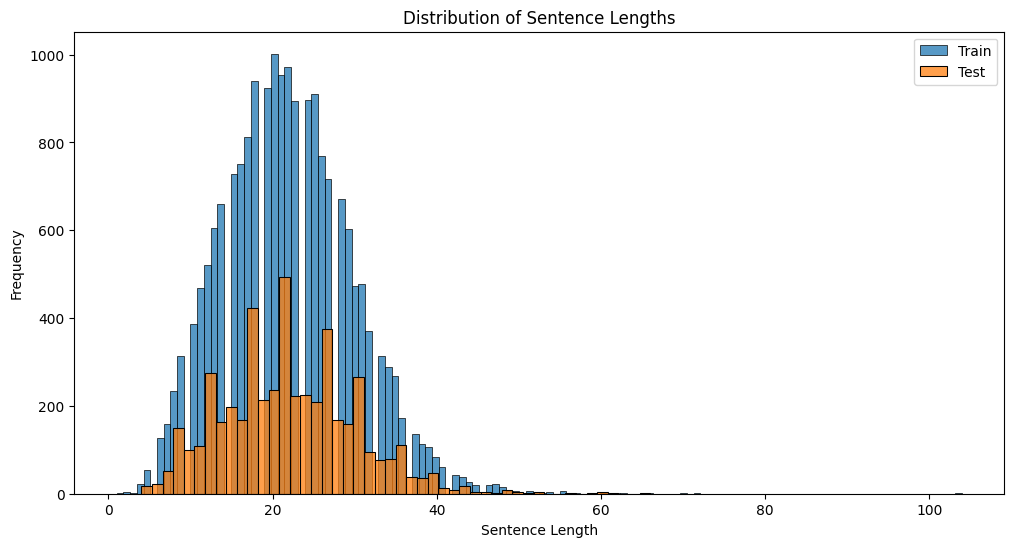

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['sentence_length'], label='Train')
sns.histplot(test_df['sentence_length'], label='Test')

plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
# Unique POS tags
all_pos_tags = []

train_df['POS'] = train_df['POS'].apply(ast.literal_eval)    # Convert string representations to actual lists
test_df['POS'] = test_df['POS'].apply(ast.literal_eval)

for tags in train_df['POS']:
    all_pos_tags.extend(tags)

tag_counts = Counter(all_pos_tags)      # Count frequencies

unique_tags = len(tag_counts)
print(f"Number of unique POS tags: {unique_tags}")

Number of unique POS tags: 41


In [13]:
# Print POS tags and their frequencies
print("All POS tags and their frequencies:")
print(list(tag_counts.items()))

All POS tags and their frequencies:
[('NNP', 52470), ('NNS', 30299), ('VBD', 15672), ('JJ', 31267), ('NN', 58417), (',', 13099), ('IN', 48224), ('TO', 9266), ('VB', 9735), ('CC', 9469), ('DT', 39573), ('.', 19129), ('RB', 8101), ('POS', 4529), ('PRP', 5311), ('``', 1377), ('MD', 2769), ('VBN', 13002), ('WP', 995), ('VBG', 7714), ('VBZ', 9957), ('PRP$', 3378), ('WDT', 1427), ('VBP', 6548), ('EX', 266), ('WRB', 871), ('NNPS', 997), ('CD', 9711), ('JJS', 1171), ('LRB', 250), ('$', 477), ('RRB', 250), ('RBR', 397), ('RP', 1047), ('JJR', 1150), (':', 339), ('PDT', 58), ('WP$', 39), ('RBS', 113), (';', 94), ('UH', 10)]


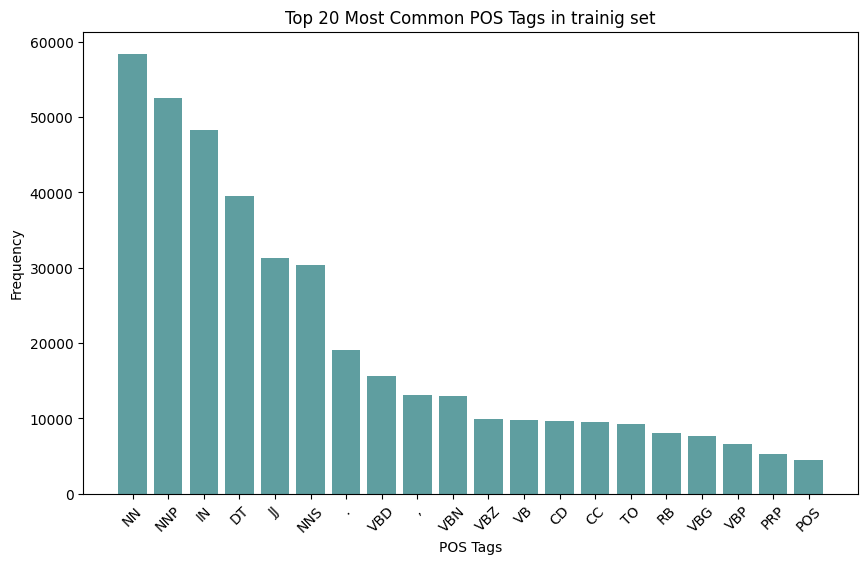

In [14]:
top_pos = tag_counts.most_common(20)

pos_df = pd.DataFrame(top_pos, columns=['POS', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(pos_df['POS'], pos_df['Count'], color='cadetblue')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common POS Tags in trainig set')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [15]:
# Word Tokenization
train_df['tokens'] = train_df['Sentence'].apply(lambda x: word_tokenize(str(x)))
test_df['tokens'] = test_df['Sentence'].apply(lambda x: word_tokenize(str(x)))

In [16]:
# Convert words to integers
tokenizer = Tokenizer(lower=False, oov_token="UNK")
tokenizer.fit_on_texts(train_df['tokens'])

X_train_seq = tokenizer.texts_to_sequences(train_df['tokens'])
X_test_seq = tokenizer.texts_to_sequences(test_df['tokens'])

In [17]:
#Encode tags using label encoder
tag_encoder = LabelEncoder()
tag_encoder.fit(all_pos_tags)

y_train_seq = [tag_encoder.transform(tags).tolist() for tags in train_df['POS']]
y_test_seq = [tag_encoder.transform(tags).tolist() for tags in test_df['POS']]

In [18]:
# Pad sequences to the same length
# Pad input sequences
X_train = pad_sequences(X_train_seq, padding='post', maxlen = train_max_length)
X_test = pad_sequences(X_test_seq, padding='post', maxlen = train_max_length)

# Pad tag sequences
y_train = pad_sequences(y_train_seq, padding='post', maxlen = train_max_length)
y_test = pad_sequences(y_test_seq, padding='post', maxlen = train_max_length)

In [19]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes = unique_tags)
y_test = to_categorical(y_test, num_classes = unique_tags)

# Verify the shapes of the one-hot encoded labels
print(f"One-hot encoded training labels shape: {y_train.shape}")
print(f"One-hot encoded test labels shape: {y_test.shape}")

One-hot encoded training labels shape: (19183, 104, 41)
One-hot encoded test labels shape: (4796, 104, 41)


In [20]:
# Splitting Training Data into Train and Validation Sets (90:10)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.1, random_state=37)

In [21]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train_split.shape))
print('Shape of output sequences: {}'.format(y_train_split.shape))
print("-" * 50)

print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_val_split.shape))
print('Shape of output sequences: {}'.format(y_val_split.shape))
print("-" * 50)

print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(y_test.shape))

TRAINING DATA
Shape of input sequences: (17264, 104)
Shape of output sequences: (17264, 104, 41)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (1919, 104)
Shape of output sequences: (1919, 104, 41)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (4796, 104)
Shape of output sequences: (4796, 104, 41)


# **Model : Simple RNN**

In [52]:
rnn_model = Sequential()
rnn_model.add(Input(shape=(train_max_length,)))
rnn_model.add(Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 128))
rnn_model.add(SimpleRNN(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
rnn_model.add(Dropout(0.3))
rnn_model.add(TimeDistributed(Dense(unique_tags, activation='softmax')))

In [53]:
rnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [54]:
rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 104, 128)       │     2,932,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 104, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 104, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 104, 41)        │         2,665 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,947,753 (11.24 MB)

 Trainable params: 2,947,753 (11.24 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = rnn_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32
)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.7950 - loss: 0.8964 - val_accuracy: 0.9525 - val_loss: 0.1973
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 80s 120ms/step - accuracy: 0.9631 - loss: 0.1568 - val_accuracy: 0.9886 - val_loss: 0.0481
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 82s 120ms/step - accuracy: 0.9897 - loss: 0.0480 - val_accuracy: 0.9903 - val_loss: 0.0366
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 63s 116ms/step - accuracy: 0.9928 - loss: 0.0307 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 64s 119ms/step - accuracy: 0.9935 - loss: 0.0261 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.9941 - loss: 0.0225 - val_accuracy: 0.9911 - val_loss: 0.0322
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 80s 117ms/step - accuracy: 0.9943 - loss: 0.0218 - val_accuracy: 0.9913 - val_loss: 0.0320
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.9949 - loss: 0

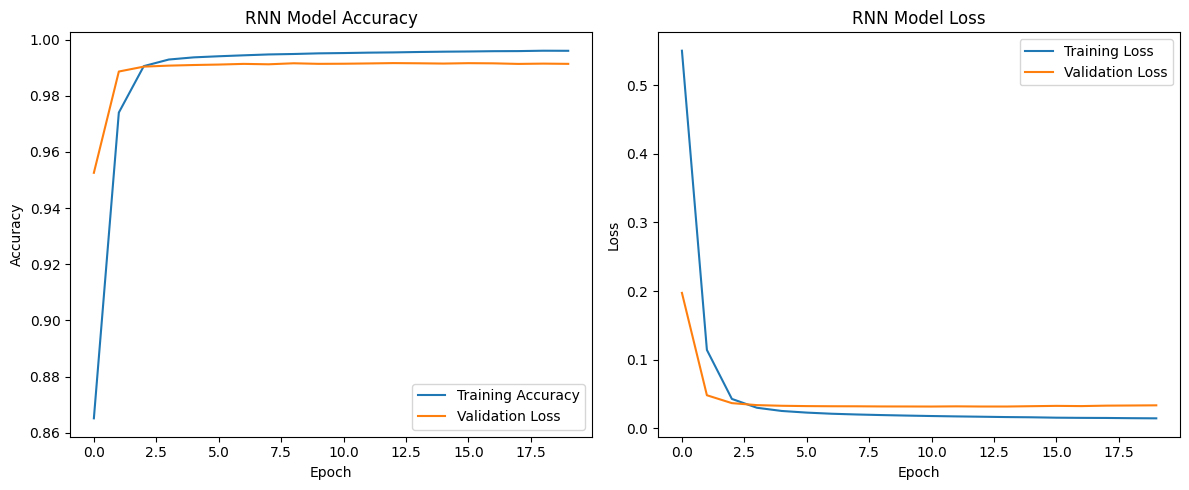

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Loss')
ax1.set_title('RNN Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('RNN Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [57]:
y_pred_probs = rnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)
y_true = np.argmax(y_test, axis=-1)
# Create mask to ignore padding
mask = (X_test != 0)

# Flatten only the valid parts
y_pred_flat_rnn = y_pred[mask]
y_true_flat_rnn = y_true[mask]


rnn_accuracy = accuracy_score(y_true_flat_rnn, y_pred_flat_rnn)
rnn_f1_macro = f1_score(y_true_flat_rnn, y_pred_flat_rnn, average='macro')
rnn_f1_weighted = f1_score(y_true_flat_rnn, y_pred_flat_rnn, average='weighted')

print(f"Accuracy: {rnn_accuracy:.4f}")
print(f"F1 Score (Macro): {rnn_f1_macro:.4f}")
print(f"F1 Score (Weighted): {rnn_f1_weighted:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
Accuracy: 0.9575
F1 Score (Macro): 0.8976
F1 Score (Weighted): 0.9576


In [58]:
# Classification Report
report = classification_report(y_true_flat_rnn, y_pred_flat_rnn, target_names=tag_encoder.classes_)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           $       0.90      0.79      0.84       133
           ,       1.00      1.00      1.00      3314
           .       0.99      0.99      0.99      4789
           :       0.54      0.70      0.61        73
           ;       1.00      1.00      1.00        22
          CC       0.99      0.99      0.99      2474
          CD       0.99      0.94      0.97      2522
          DT       1.00      0.99      0.99      9797
          EX       0.91      0.95      0.93        75
          IN       0.98      0.98      0.98     12190
          JJ       0.85      0.92      0.88      7807
         JJR       0.87      0.97      0.92       291
         JJS       0.98      0.92      0.95       309
         LRB       0.97      0.97      0.97        67
          MD       0.99      0.99      0.99       734
          NN       0.93      0.96      0.95     14705
         NNP       0.97      0.94      0.95     13148
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


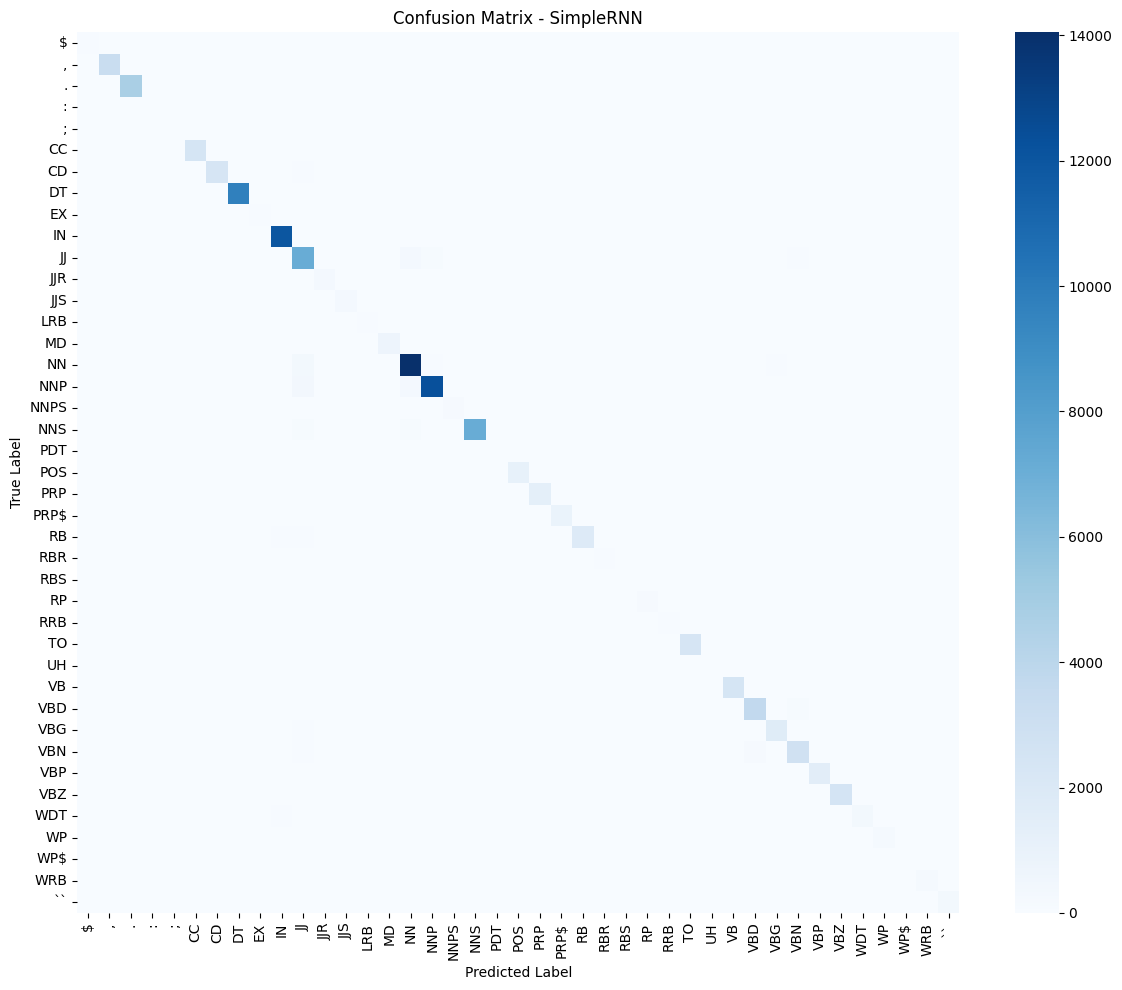

In [59]:
# Confusion Matrix
cm = confusion_matrix(y_true_flat_rnn, y_pred_flat_rnn)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=tag_encoder.classes_,
            yticklabels=tag_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SimpleRNN')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Model : LSTM**

In [44]:
lstm_model = Sequential()
lstm_model.add(Input(shape=(train_max_length,)))
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
lstm_model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.3))
lstm_model.add(Dropout(0.3))
lstm_model.add(TimeDistributed(Dense(unique_tags, activation='softmax')))

In [45]:
# Compile model
lstm_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [46]:
lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 104, 128)       │     2,932,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 104, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 104, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 104, 41)        │         2,665 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,984,809 (11.39 MB)

 Trainable params: 2,984,809 (11.39 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train model
lstm_history = lstm_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32
)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 139s 238ms/step - accuracy: 0.8495 - loss: 0.7624 - val_accuracy: 0.9789 - val_loss: 0.0988
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 124s 230ms/step - accuracy: 0.9826 - loss: 0.0822 - val_accuracy: 0.9898 - val_loss: 0.0420
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 126s 234ms/step - accuracy: 0.9919 - loss: 0.0367 - val_accuracy: 0.9909 - val_loss: 0.0341
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 126s 234ms/step - accuracy: 0.9935 - loss: 0.0276 - val_accuracy: 0.9915 - val_loss: 0.0315
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 125s 231ms/step - accuracy: 0.9944 - loss: 0.0212 - val_accuracy: 0.9916 - val_loss: 0.0286
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 146s 239ms/step - accuracy: 0.9949 - loss: 0.0177 - val_accuracy: 0.9918 - val_loss: 0.0279
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 124s 229ms/step - accuracy: 0.9952 - loss: 0.0164 - val_accuracy: 0.9917 - val_loss: 0.0280
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 145s 234ms/step - accuracy: 0.9954 -

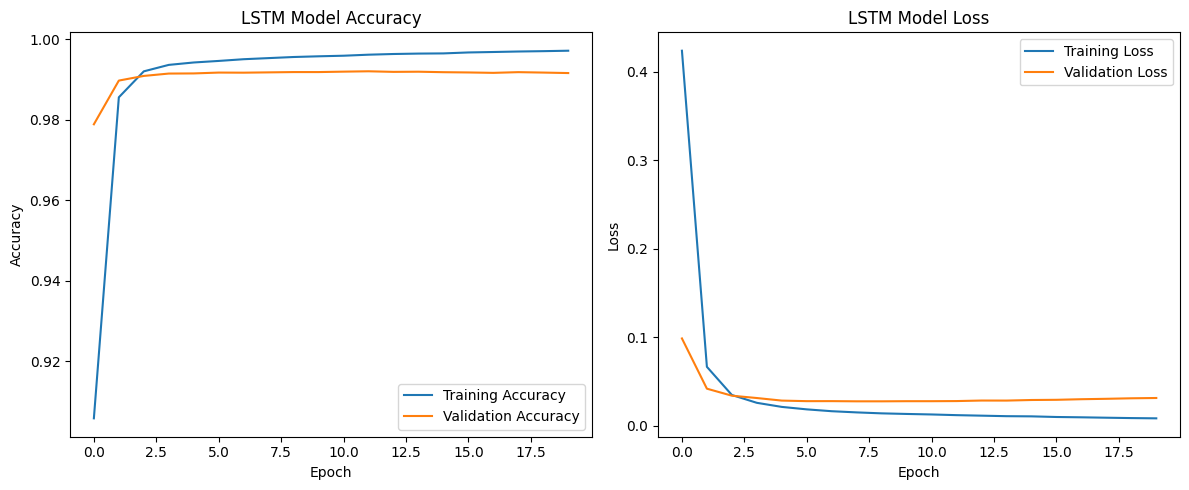

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax1.plot(lstm_history.history['accuracy'], label='Training Accuracy')
ax1.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('LSTM Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(lstm_history.history['loss'], label='Training Loss')
ax2.plot(lstm_history.history['val_loss'], label='Validation Loss')
ax2.set_title('LSTM Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [49]:
y_pred_probs = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)
y_true = np.argmax(y_test, axis=-1)

mask = (X_test != 0)


y_pred_flat_lstm = y_pred[mask]
y_true_flat_lstm = y_true[mask]

lstm_accuracy = accuracy_score(y_true_flat_lstm, y_pred_flat_lstm)
lstm_f1_macro = f1_score(y_true_flat_lstm, y_pred_flat_lstm, average='macro')
lstm_f1_weighted = f1_score(y_true_flat_lstm, y_pred_flat_lstm, average='weighted')

print(f"Accuracy: {lstm_accuracy:.4f}")
print(f"F1 Score (Macro): {lstm_f1_macro:.4f}")
print(f"F1 Score (Weighted): {lstm_f1_weighted:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step
Accuracy: 0.9598
F1 Score (Macro): 0.9105
F1 Score (Weighted): 0.9599


In [50]:
# Classification Report
report = classification_report(y_true_flat_lstm, y_pred_flat_lstm, target_names=tag_encoder.classes_)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           $       0.92      0.93      0.93       133
           ,       1.00      0.99      1.00      3314
           .       0.99      0.99      0.99      4789
           :       0.54      0.79      0.64        73
           ;       1.00      1.00      1.00        22
          CC       1.00      0.99      0.99      2474
          CD       1.00      0.94      0.97      2522
          DT       0.99      0.99      0.99      9797
          EX       0.96      0.97      0.97        75
          IN       0.98      0.98      0.98     12190
          JJ       0.87      0.91      0.89      7807
         JJR       0.86      0.97      0.91       291
         JJS       0.96      0.93      0.95       309
         LRB       1.00      0.97      0.98        67
          MD       1.00      0.99      1.00       734
          NN       0.94      0.96      0.95     14705
         NNP       0.96      0.95      0.96     13148
   

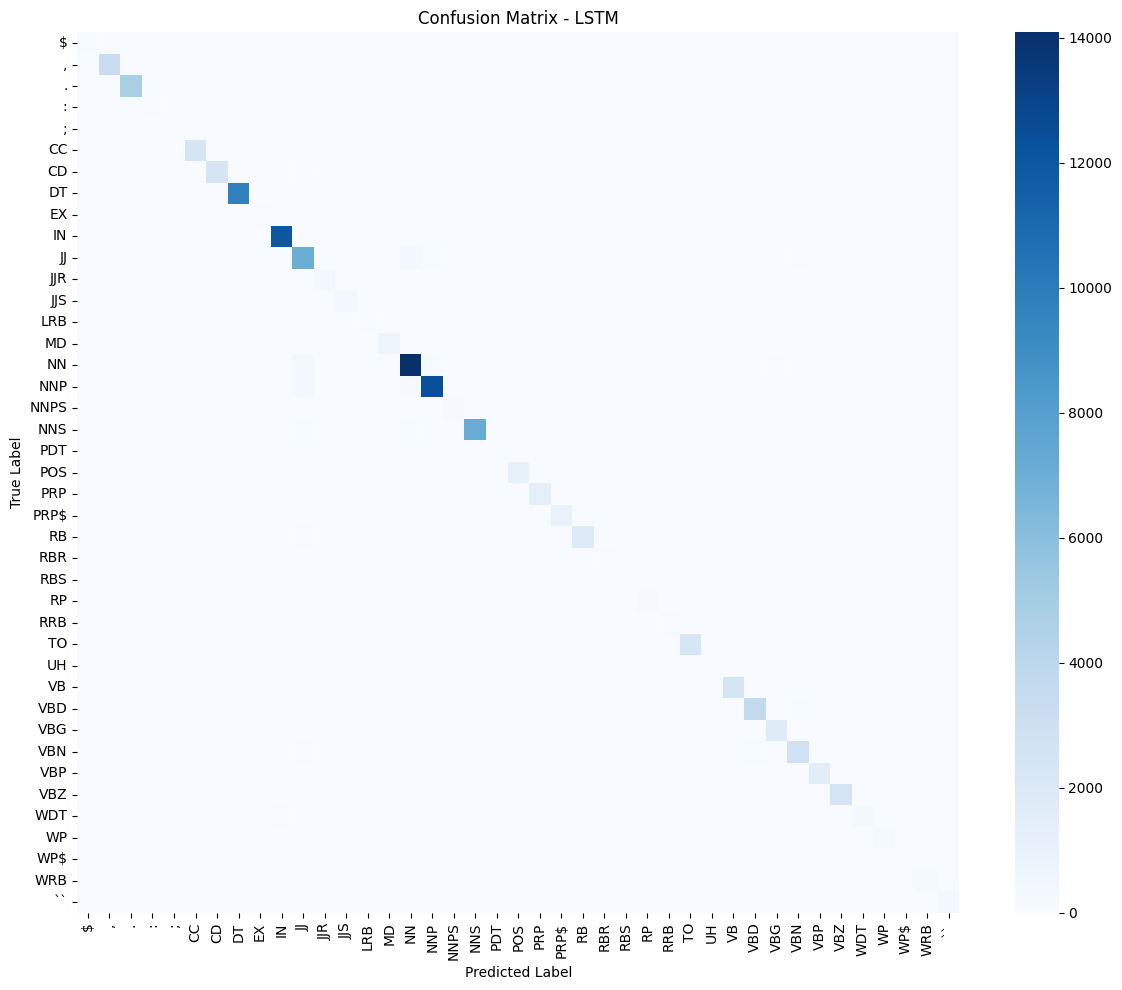

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_true_flat_lstm, y_pred_flat_lstm)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=tag_encoder.classes_,
            yticklabels=tag_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Model : GRU**

In [61]:
gru_model = Sequential()
gru_model.add(Input(shape=(train_max_length,)))
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
gru_model.add(GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.3))
gru_model.add(Dropout(0.3))
gru_model.add(TimeDistributed(Dense(unique_tags, activation='softmax')))

In [62]:
# Compile model
gru_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [63]:
gru_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 104, 128)       │     2,932,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 104, 64)        │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 104, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 104, 41)        │         2,665 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,972,649 (11.34 MB)

 Trainable params: 2,972,649 (11.34 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Train model
gru_history = gru_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32
)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - accuracy: 0.8773 - loss: 0.5893 - val_accuracy: 0.9861 - val_loss: 0.0595
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 137s 233ms/step - accuracy: 0.9888 - loss: 0.0518 - val_accuracy: 0.9904 - val_loss: 0.0354
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 126s 233ms/step - accuracy: 0.9931 - loss: 0.0289 - val_accuracy: 0.9911 - val_loss: 0.0313
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 128s 237ms/step - accuracy: 0.9941 - loss: 0.0231 - val_accuracy: 0.9916 - val_loss: 0.0300
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 129s 239ms/step - accuracy: 0.9948 - loss: 0.0194 - val_accuracy: 0.9916 - val_loss: 0.0293
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 128s 237ms/step - accuracy: 0.9950 - loss: 0.0185 - val_accuracy: 0.9918 - val_loss: 0.0274
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 140s 234ms/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9919 - val_loss: 0.0271
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 143s 235ms/step - accuracy: 0.9957 -

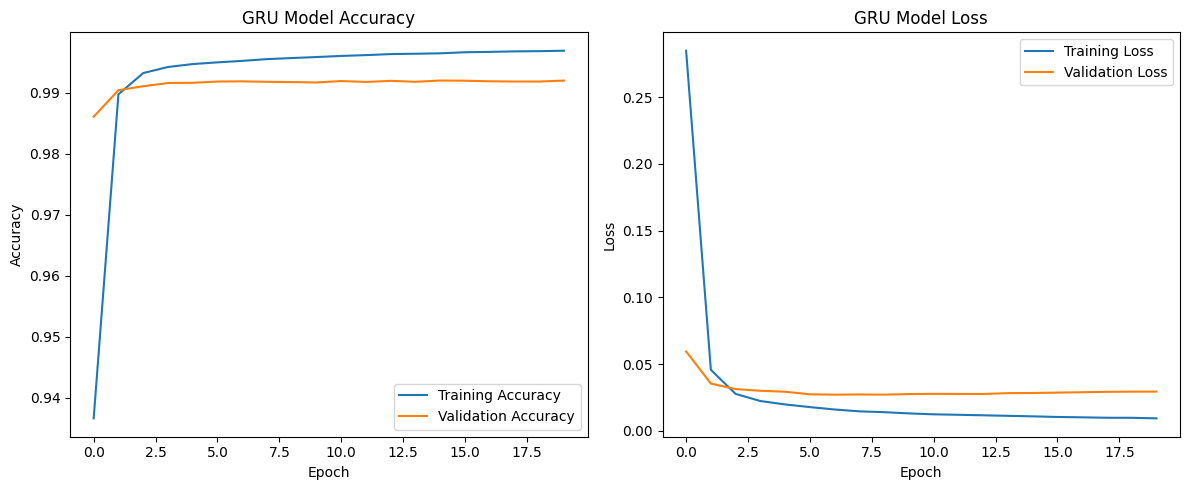

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax1.plot(gru_history.history['accuracy'], label='Training Accuracy')
ax1.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('GRU Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(gru_history.history['loss'], label='Training Loss')
ax2.plot(gru_history.history['val_loss'], label='Validation Loss')
ax2.set_title('GRU Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [66]:
y_pred_probs = gru_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)
y_true = np.argmax(y_test, axis=-1)
# Create mask to ignore padding
mask = (X_test != 0)

# Flatten only the valid parts
y_pred_flat_gru = y_pred[mask]
y_true_flat_gru = y_true[mask]

gru_accuracy = accuracy_score(y_true_flat_gru, y_pred_flat_gru)
gru_f1_macro = f1_score(y_true_flat_gru, y_pred_flat_gru, average='macro')
gru_f1_weighted = f1_score(y_true_flat_gru, y_pred_flat_gru, average='weighted')

print(f"Accuracy: {gru_accuracy:.4f}")
print(f"F1 Score (Macro): {gru_f1_macro:.4f}")
print(f"F1 Score (Weighted): {gru_f1_weighted:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step
Accuracy: 0.9600
F1 Score (Macro): 0.9143
F1 Score (Weighted): 0.9602


In [67]:
# Classification Report
report = classification_report(y_true_flat_gru, y_pred_flat_gru, target_names=tag_encoder.classes_)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           $       0.94      0.93      0.94       133
           ,       0.99      1.00      1.00      3314
           .       0.99      1.00      0.99      4789
           :       0.64      0.74      0.69        73
           ;       1.00      1.00      1.00        22
          CC       0.99      0.99      0.99      2474
          CD       1.00      0.94      0.97      2522
          DT       1.00      0.99      1.00      9797
          EX       0.99      0.91      0.94        75
          IN       0.98      0.98      0.98     12190
          JJ       0.86      0.92      0.89      7807
         JJR       0.88      0.96      0.92       291
         JJS       0.96      0.93      0.95       309
         LRB       1.00      0.97      0.98        67
          MD       1.00      0.99      1.00       734
          NN       0.94      0.95      0.95     14705
         NNP       0.96      0.95      0.95     13148
   

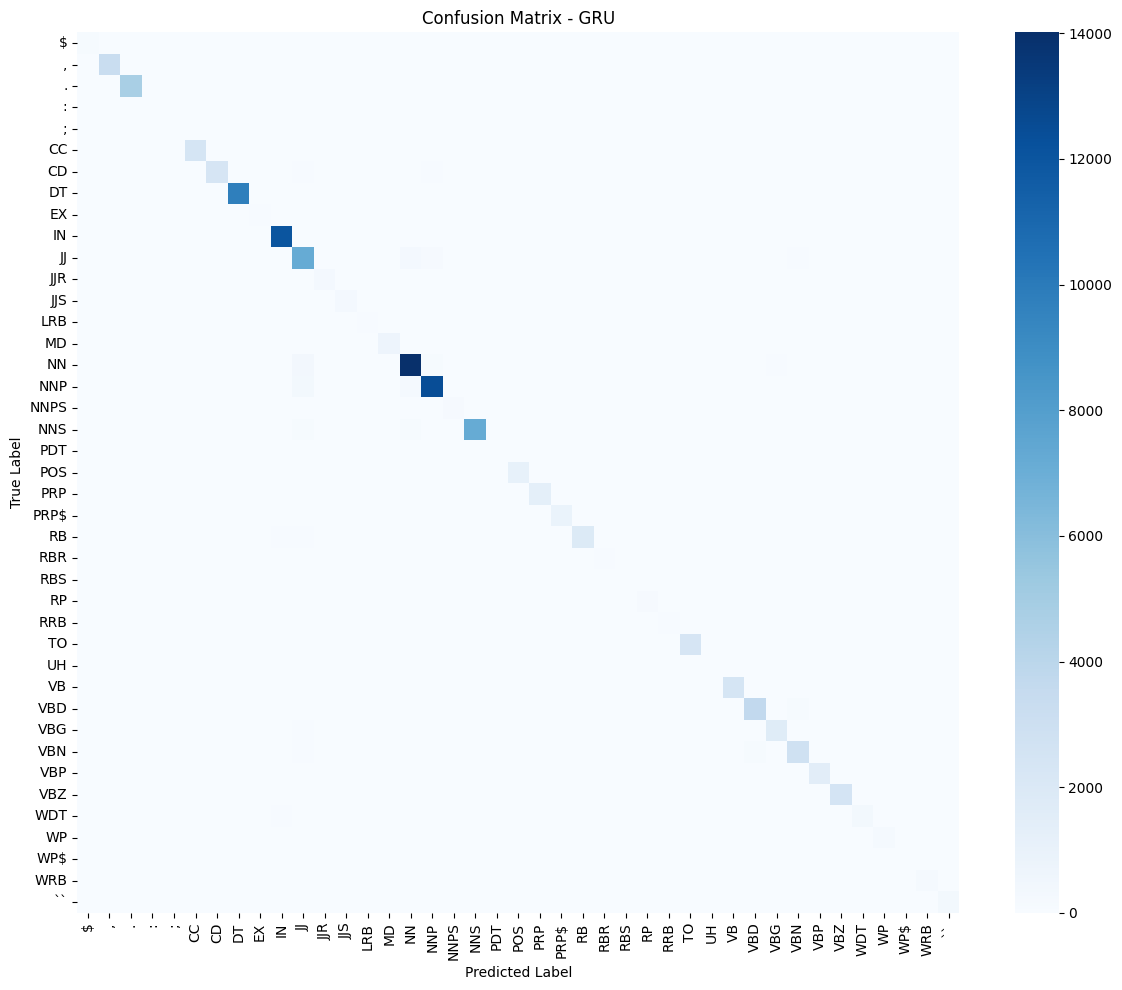

In [68]:
# Confusion Matrix
cm = confusion_matrix(y_true_flat_gru, y_pred_flat_gru)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=tag_encoder.classes_,
            yticklabels=tag_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - GRU')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Model: BiLSTM**

In [38]:
bilstm_model = Sequential()
bilstm_model.add(Input(shape=(train_max_length,)))
bilstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.3)))
bilstm_model.add(Dropout(0.3))
bilstm_model.add(TimeDistributed(Dense(unique_tags, activation='softmax')))

In [39]:
bilstm_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [40]:
bilstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 104, 128)       │     2,932,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 104, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 104, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 104, 41)        │         5,289 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,036,841 (11.58 MB)

 Trainable params: 3,036,841 (11.58 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
bilstm_history = bilstm_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32
)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 255s 438ms/step - accuracy: 0.8566 - loss: 0.6301 - val_accuracy: 0.9858 - val_loss: 0.0633
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 243s 404ms/step - accuracy: 0.9880 - loss: 0.0540 - val_accuracy: 0.9918 - val_loss: 0.0318
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 261s 402ms/step - accuracy: 0.9938 - loss: 0.0274 - val_accuracy: 0.9926 - val_loss: 0.0271
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 216s 400ms/step - accuracy: 0.9953 - loss: 0.0196 - val_accuracy: 0.9929 - val_loss: 0.0237
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 264s 404ms/step - accuracy: 0.9962 - loss: 0.0143 - val_accuracy: 0.9931 - val_loss: 0.0228
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 261s 403ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9932 - val_loss: 0.0226
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 263s 406ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.9934 - val_loss: 0.0227
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 260s 401ms/step - accuracy: 0.9971 -

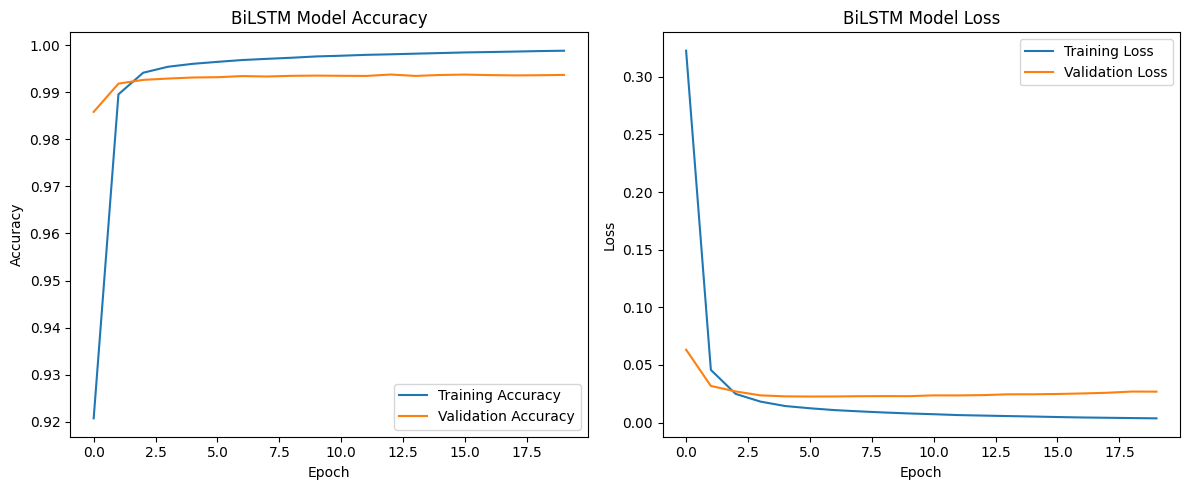

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax1.plot(bilstm_history.history['accuracy'], label='Training Accuracy')
ax1.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('BiLSTM Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(bilstm_history.history['loss'], label='Training Loss')
ax2.plot(bilstm_history.history['val_loss'], label='Validation Loss')
ax2.set_title('BiLSTM Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


In [43]:
y_pred_probs_bilstm = bilstm_model.predict(X_test)
y_pred_bilstm = np.argmax(y_pred_probs_bilstm, axis=-1)
y_true = np.argmax(y_test, axis=-1)

mask = (X_test != 0)

y_pred_flat_bilstm = y_pred_bilstm[mask]
y_true_flat_bilstm = y_true[mask]


bilstm_accuracy = accuracy_score(y_true_flat_bilstm, y_pred_flat_bilstm)
bilstm_f1_macro = f1_score(y_true_flat_bilstm, y_pred_flat_bilstm, average='macro')
bilstm_f1_weighted = f1_score(y_true_flat_bilstm, y_pred_flat_bilstm, average='weighted')


print(f"Accuracy: {bilstm_accuracy:.4f}")
print(f"F1 Score (Macro): {bilstm_f1_macro:.4f}")
print(f"F1 Score (Weighted): {bilstm_f1_weighted:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step
Accuracy: 0.9687
F1 Score (Macro): 0.9479
F1 Score (Weighted): 0.9688


In [ ]:
# Classification Report
report = classification_report(y_true_flat_bilstm, y_pred_flat_bilstm, target_names=tag_encoder.classes_)
print("\nClassification Report:")
print(report)

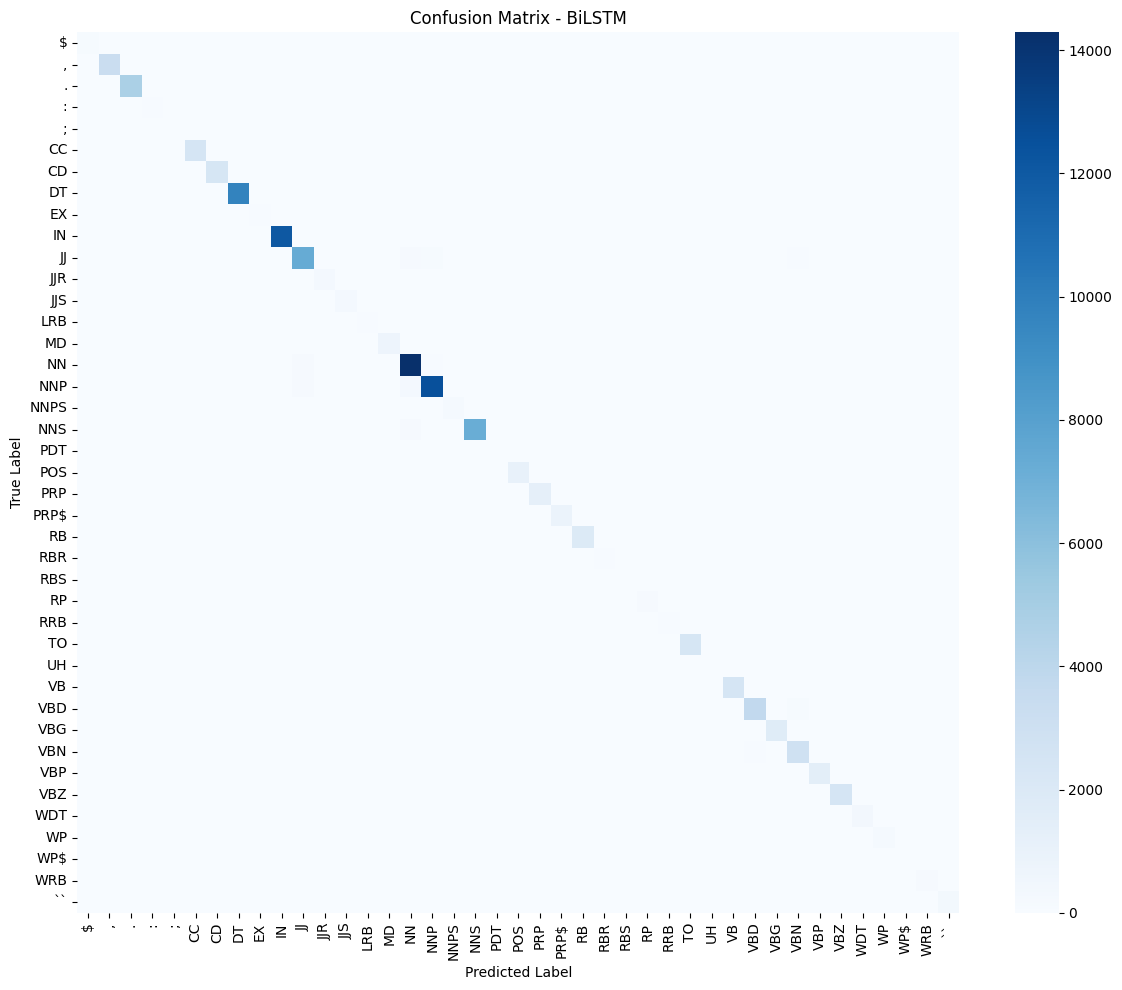

In [32]:
cm = confusion_matrix(y_true_flat_bilstm, y_pred_flat_bilstm)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=tag_encoder.classes_,
            yticklabels=tag_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - BiLSTM')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Model performance comparison**

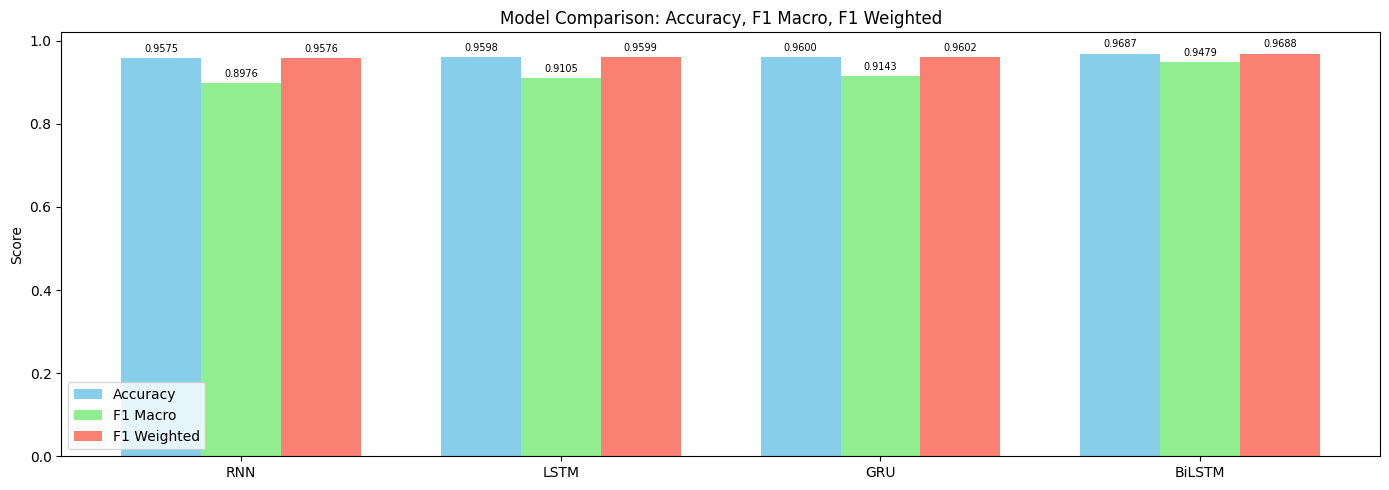

In [95]:
models = ['RNN', 'LSTM', 'GRU', 'BiLSTM']

# Metrics
accuracy_scores = [rnn_accuracy, lstm_accuracy, gru_accuracy, bilstm_accuracy]
f1_macro_scores = [rnn_f1_macro, lstm_f1_macro, gru_f1_macro, bilstm_f1_macro]
f1_weighted_scores = [rnn_f1_weighted, lstm_f1_weighted, gru_f1_weighted, bilstm_f1_weighted]

bar_width = 0.25
x = np.arange(len(models))

plt.figure(figsize=(14, 5))
plt.bar(x - bar_width, accuracy_scores, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x, f1_macro_scores, width=bar_width, label='F1 Macro', color='lightgreen')
plt.bar(x + bar_width, f1_weighted_scores, width=bar_width, label='F1 Weighted', color='salmon')

for scores, offset in zip([accuracy_scores, f1_macro_scores, f1_weighted_scores], [-bar_width, 0, bar_width]):
    for i, score in enumerate(scores):
        plt.text(x[i] + offset, score + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=7)

plt.xticks(x, models)
plt.ylim(0, 1.02)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, F1 Macro, F1 Weighted')
plt.legend()
plt.tight_layout()
plt.show()